## Splitting data

In [1]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# spambase_augmented = pd.read_csv('spambase_augmented.csv')

# features = spambase_augmented.drop(spambase_augmented.columns[-1], axis=1)
# target = spambase_augmented[spambase_augmented.columns[-1]]

# X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# print(X_train.shape)
# print(X_val.shape)
# print(X_test.shape)





In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

def plot_decision_tree(dt, title):
    plt.figure(figsize=(20, 10))
    plot_tree(dt, filled=True)
    plt.title(title)
    plt.show()

In [3]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score 
# import pandas as pd
# from sklearn.model_selection import train_test_split


# spambase_augmented = pd.read_csv('spambase_augmented.csv')

# features = spambase_augmented.drop(spambase_augmented.columns[-1], axis=1)
# target = spambase_augmented[spambase_augmented.columns[-1]]

# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.95, random_state=42)

# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

# dt = DecisionTreeClassifier(criterion='gini', random_state=42)
# dt.fit(X_train, y_train)

# y_train_pred = dt.predict(X_train)
# y_test_pred = dt.predict(X_test)

# training_accuracy = accuracy_score(y_train, y_train_pred)
# testing_accuracy = accuracy_score(y_test, y_test_pred)

# print('Training accuracy: ', training_accuracy)
# print('Testing accuracy: ', testing_accuracy)

# plot_decision_tree(dt, 'spam_decision_tree_entropy.png')



## Normalizing Data

Not actually needed but already implemented before realising that

In [4]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# X_train_scaled = pd.DataFrame(X_train_scaled)
# X_test_scaled = pd.DataFrame(X_test_scaled)

# X_train_scaled.to_csv('X_train_scaled.csv', index=False)
# X_test_scaled.to_csv('X_test_scaled.csv', index=False)


In [5]:
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree

# def plot_decision_tree(dt, title):
#     plt.figure(figsize=(20, 10))
#     plot_tree(dt, filled=True)
#     plt.title(title)
#     plt.show()

# Varying max depth 

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
import pandas as pd
from sklearn.model_selection import train_test_split


spambase_augmented = pd.read_csv('spambase_augmented.csv')

features = spambase_augmented.drop(spambase_augmented.columns[-1], axis=1)
target = spambase_augmented[spambase_augmented.columns[-1]]


###VARIABLES TO CHANGE
test_size = 0.2
criterion = 'entropy'


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=42)

max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

training_errors = []
testing_errors = []

for depth in max_depths:

    print("Working with depth: ", depth)

    dt = DecisionTreeClassifier(criterion=criterion, random_state=42, max_depth=depth)
    dt.fit(X_train, y_train)

    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)

    training_accuracy = accuracy_score(y_train, y_train_pred)
    testing_accuracy = accuracy_score(y_test, y_test_pred)

    training_errors.append(1 - training_accuracy)
    testing_errors.append(1 - testing_accuracy)

Working with depth:  1
Working with depth:  2
Working with depth:  3
Working with depth:  4
Working with depth:  5
Working with depth:  6
Working with depth:  7
Working with depth:  8
Working with depth:  9
Working with depth:  10
Working with depth:  11
Working with depth:  12
Working with depth:  13
Working with depth:  14
Working with depth:  15
Working with depth:  16
Working with depth:  17
Working with depth:  18
Working with depth:  19
Working with depth:  20
Working with depth:  21
Working with depth:  22
Working with depth:  23
Working with depth:  24
Working with depth:  25
Working with depth:  26
Working with depth:  27
Working with depth:  28
Working with depth:  29


In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


def plot_accuracies_with_varying_depths(training_errors, testing_errors, title):
    plt.figure(figsize=(10, 6))
    plt.plot(max_depths, training_errors, label='Training Error',  linestyle='-', color='orange', marker='o', markersize=5)
    plt.plot(max_depths, testing_errors, label='Test Error', linestyle='-', color='blue', marker='o', markersize=5)

    plt.title(title)
    plt.xlabel('Max Depth')
    plt.ylabel('Error')
    plt.legend()

    plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))


    plt.grid(True)
    plt.show()

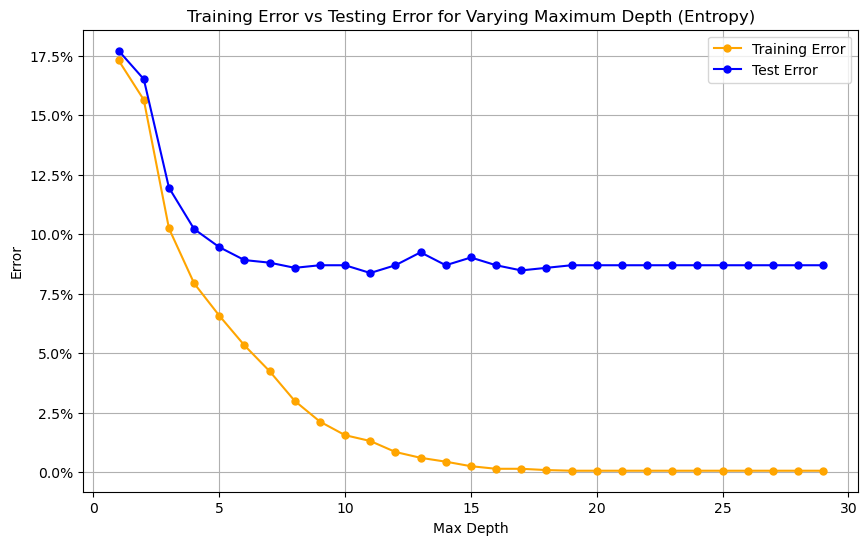

In [31]:
plot_accuracies_with_varying_depths(training_errors, testing_errors, 'Training Error vs Testing Error for Varying Maximum Depth (Entropy)')

# Varying training/testing split

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
import pandas as pd
from sklearn.model_selection import train_test_split


spambase_augmented = pd.read_csv('spambase_augmented.csv')

features = spambase_augmented.drop(spambase_augmented.columns[-1], axis=1)
target = spambase_augmented[spambase_augmented.columns[-1]]

###VARIABLES TO CHANGE
test_size = 0.2
criterion = 'gini'

training_splits = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

training_errors = []    
testing_errors = []

for train_split in training_splits:

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, train_size=train_split, random_state=42)

    dt = DecisionTreeClassifier(criterion=criterion, random_state=42)
    dt.fit(X_train, y_train)

    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)

    training_accuracy = accuracy_score(y_train, y_train_pred)
    testing_accuracy = accuracy_score(y_test, y_test_pred)

    training_errors.append(1 - training_accuracy)
    testing_errors.append(1 - testing_accuracy)


In [34]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


def plot_accuracies_with_varying_splits(training_errors, testing_errors, title):
    plt.figure(figsize=(10, 6))
    plt.plot(training_splits, training_errors, label='Training Error',  linestyle='-', color='orange', marker='o', markersize=5)
    plt.plot(training_splits, testing_errors, label='Test Error', linestyle='-', color='blue', marker='o', markersize=5)

    plt.title(title)
    plt.xlabel('Training Split')
    plt.ylabel('Error')
    plt.legend()

    plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))


    plt.grid(True)
    plt.show()

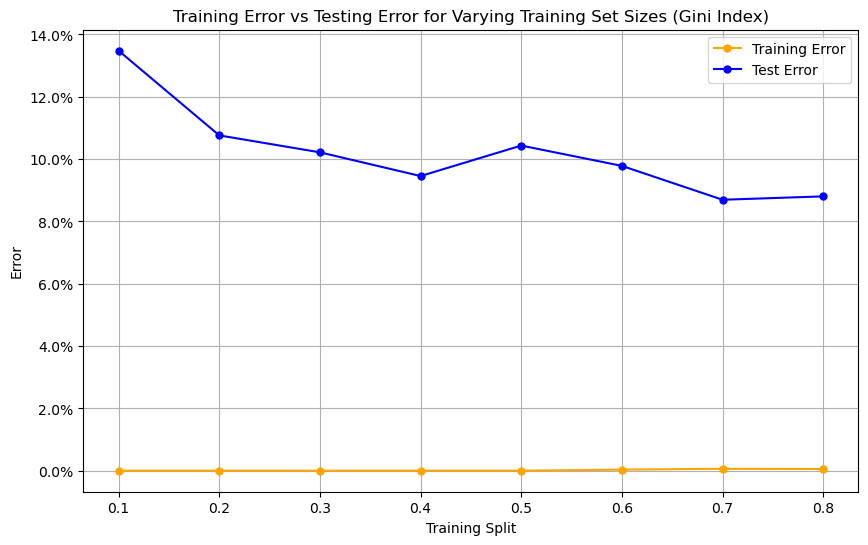

In [37]:
plot_accuracies_with_varying_splits(training_errors, testing_errors, 'Training Error vs Testing Error for Varying Training Set Sizes (Gini Index)')

In [12]:
# plot_decision_tree(dt_with_gini, 'Decision Tree with Gini')

# Varying min-samples-split

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
import pandas as pd
from sklearn.model_selection import train_test_split

###VARIABLES TO CHANGE
test_size = 0.2
criterion = 'gini'


spambase_augmented = pd.read_csv('spambase_augmented.csv')

features = spambase_augmented.drop(spambase_augmented.columns[-1], axis=1)
target = spambase_augmented[spambase_augmented.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=42)



min_samples_splits = [2, 4, 8, 16, 32, 64, 128, 256, 512]

training_errors = []
testing_errors = []

for min_sample_split in min_samples_splits:

    dt = DecisionTreeClassifier(criterion=criterion, random_state=42, min_samples_split=min_sample_split)
    dt.fit(X_train, y_train)

    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)

    training_accuracy = accuracy_score(y_train, y_train_pred)
    testing_accuracy = accuracy_score(y_test, y_test_pred)

    training_errors.append(1 - training_accuracy)
    testing_errors.append(1 - testing_accuracy)


In [12]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


def plot_accuracies_with_varying_min_sample_split(training_errors, testing_errors, title):
    plt.figure(figsize=(10, 6))
    plt.plot(min_samples_splits, training_errors, label='Training Error',  linestyle='-', color='orange', marker='o', markersize=5)
    plt.plot(min_samples_splits, testing_errors, label='Test Error', linestyle='-', color='blue', marker='o', markersize=5)

    plt.title(title)
    plt.xlabel('Minimum Samples per Split')
    plt.ylabel('Error')
    plt.legend()

    plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))


    plt.grid(True)
    plt.show()

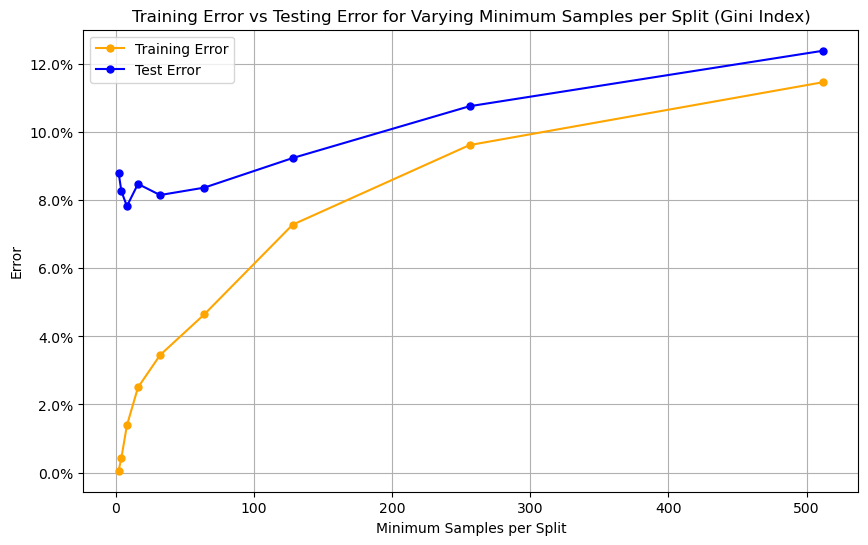

In [13]:
plot_accuracies_with_varying_min_sample_split(training_errors, testing_errors, 'Training Error vs Testing Error for Varying Minimum Samples per Split (Gini Index)')

## Reduced Error Pruning

In [28]:
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

#To check if a node is a leaf node
def is_leaf_node(tree, node_index):
    return tree.children_left[node_index] == -1 and tree.children_right[node_index] == -1


def attempt_prune(tree, node_index, best_score, dt, X_val, y_val):

    left_child = tree.children_left[node_index]
    right_child = tree.children_right[node_index]

    original_tree = (
        tree.children_left[node_index],
        tree.children_right[node_index],
        tree.value[node_index].copy()
    )

    #See what the tree would be like without children

    tree.children_left[node_index] = -1
    tree.children_right[node_index] = -1
    tree.value[node_index] = tree.value[left_child]+ tree.value[right_child]

    #Predict newly pruned tree on validation set
    y_pred = dt.predict(X_val)
    new_score = accuracy_score(y_val, y_pred)

    #If the new score is better than the best score, update the best score
    if new_score >= best_score[0]:
        best_score[0] = new_score
        
    else:
        tree.children_left[node_index], tree.children_right[node_index], tree.value[node_index] = original_tree

    
def post_order_traversal(tree, best_score, node_index, dt, X_val, y_val):
    if not is_leaf_node(tree, node_index):

        left_child = tree.children_left[node_index]
        right_child = tree.children_right[node_index]

        if left_child != -1:
            post_order_traversal(tree, best_score, left_child, dt, X_val, y_val)
        if right_child != -1:
            post_order_traversal(tree, best_score, right_child, dt, X_val, y_val)

        #At this point, we are not at a leaf node

        attempt_prune(tree, node_index, best_score, dt, X_val, y_val) 
        # print('Tree', dt.tree_.feature)


    
def reduced_error_pruning(dt, X_val, y_val):
    tree = dt.tree_
    node_index = 0
    best_score = [accuracy_score(y_val, dt.predict(X_val))]
    # print('Tree', dt.tree_.feature)
    post_order_traversal(tree, best_score, node_index, dt, X_val, y_val)

# Initial Tree

Error:  0.08260869565217388


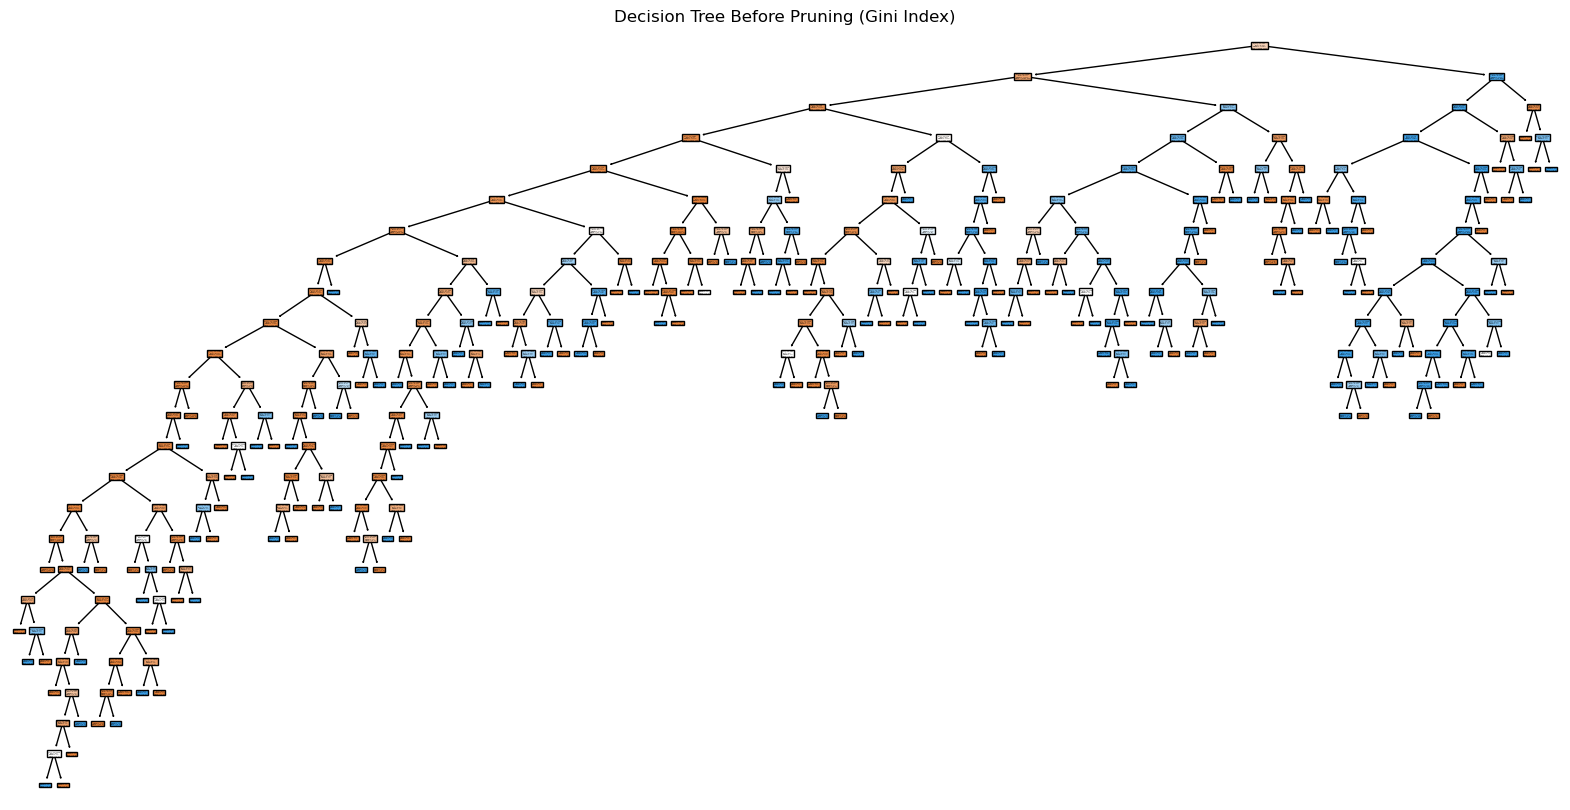

Number of nodes in the tree: 341


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
import pandas as pd
from sklearn.model_selection import train_test_split

criterion='gini'

spambase_augmented = pd.read_csv('spambase_augmented.csv')

features = spambase_augmented.drop(spambase_augmented.columns[-1], axis=1)
target = spambase_augmented[spambase_augmented.columns[-1]]

X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

dt = DecisionTreeClassifier(criterion=criterion, random_state=42)
dt.fit(X_train, y_train)

y_test_pred = dt.predict(X_test)

testing_accuracy = accuracy_score(y_test, y_test_pred)

testing_error = 1 - testing_accuracy
print('Error: ', testing_error)
plot_decision_tree(dt, 'Decision Tree Before Pruning (Gini Index)')
print("Number of nodes in the tree:", dt.tree_.node_count)


Error after pruning:  0.07173913043478264


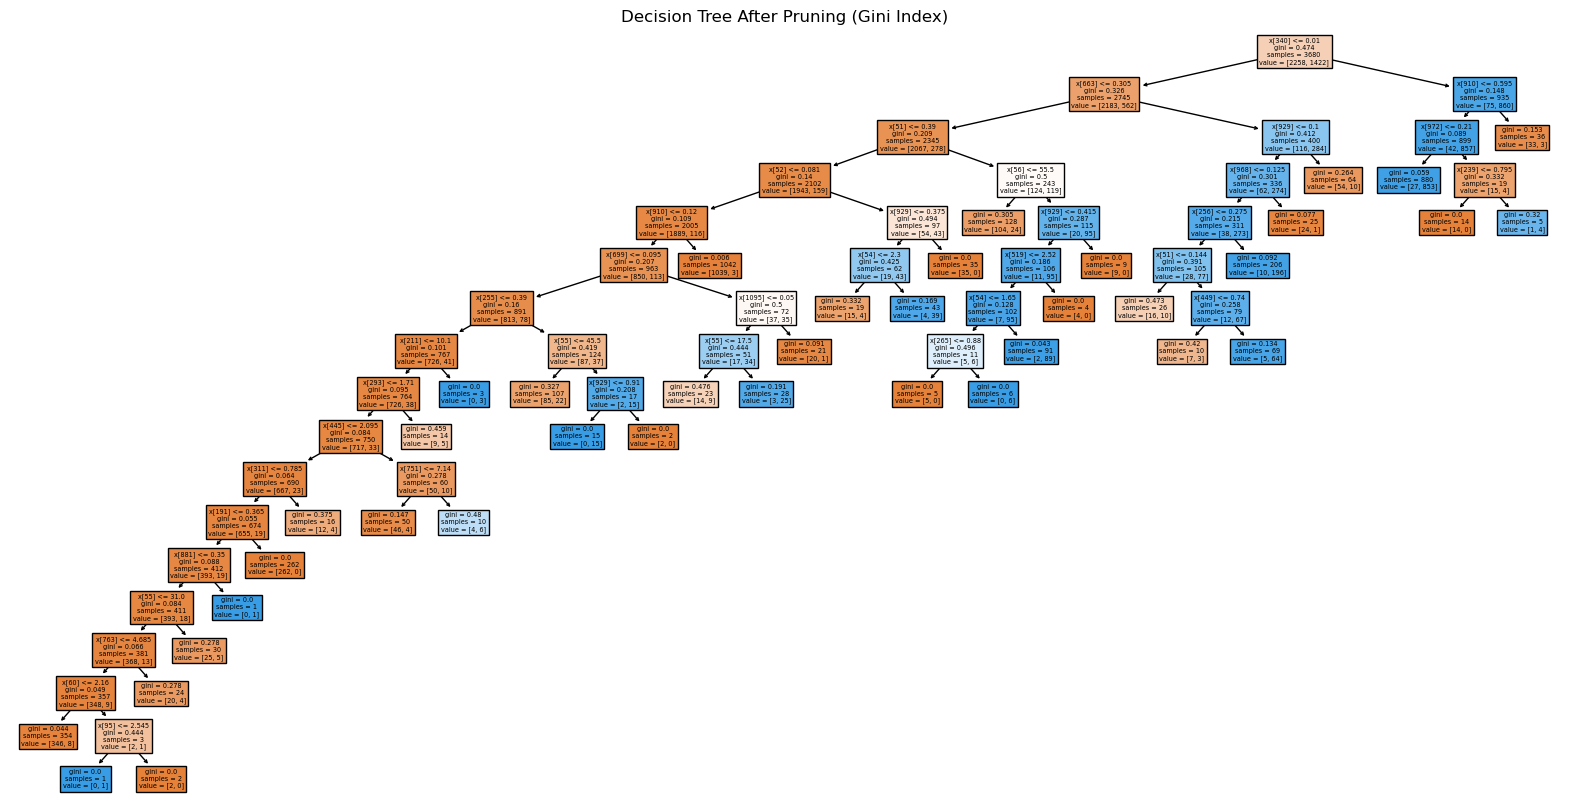

Number of nodes in the tree after pruning: 341


In [29]:
reduced_error_pruning(dt, X_val, y_val)

y_pred = dt.predict(X_test)

testing_accuracy = accuracy_score(y_test, y_pred)

testing_error = 1 - testing_accuracy

print('Error after pruning: ', testing_error)
plot_decision_tree(dt, 'Decision Tree After Pruning (Gini Index)')
print("Number of nodes in the tree after pruning:", dt.tree_.node_count)

# Pruning With a Threshold

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
import pandas as pd
from sklearn.model_selection import train_test_split

# def train_initial_tree():

criterion='entropy'

spambase_augmented = pd.read_csv('spambase_augmented.csv')

features = spambase_augmented.drop(spambase_augmented.columns[-1], axis=1)
target = spambase_augmented[spambase_augmented.columns[-1]]

X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

dt = DecisionTreeClassifier(criterion=criterion, random_state=42)
dt.fit(X_train, y_train)

y_test_pred = dt.predict(X_test)


testing_accuracy = accuracy_score(y_test, y_test_pred)

testing_error = 1 - testing_accuracy

print('Error: ', testing_error)
    # return dt

Error:  0.08260869565217388


In [21]:
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

#To check if a node is a leaf node
def is_leaf_node(tree, node_index):
    return tree.children_left[node_index] == -1 and tree.children_right[node_index] == -1


def attempt_prune(tree, node_index, best_score, dt, X_val, y_val, threshold):

    left_child = tree.children_left[node_index]
    right_child = tree.children_right[node_index]

    original_tree = (
        tree.children_left[node_index],
        tree.children_right[node_index],
        tree.value[node_index].copy()
    )

    #See what the tree would be like without children

    tree.children_left[node_index] = -1
    tree.children_right[node_index] = -1
    tree.value[node_index] = tree.value[left_child]+ tree.value[right_child]

    #Predict newly pruned tree on validation set
    y_pred = dt.predict(X_val)
    new_score = accuracy_score(y_val, y_pred)

    #If the new score is better than the best score, update the best score
    if new_score >= best_score[0] or (best_score[0] - new_score) < threshold:
        best_score[0] = new_score
    else:
        tree.children_left[node_index], tree.children_right[node_index], tree.value[node_index] = original_tree

    
def post_order_traversal(tree, best_score, node_index, dt, X_val, y_val, threshold):
    if not is_leaf_node(tree, node_index):

        left_child = tree.children_left[node_index]
        right_child = tree.children_right[node_index]

        if left_child != -1:
            post_order_traversal(tree, best_score, left_child, dt, X_val, y_val, threshold)
        if right_child != -1:
            post_order_traversal(tree, best_score, right_child, dt, X_val, y_val, threshold)

        #At this point, we are not at a leaf node

        attempt_prune(tree, node_index, best_score, dt, X_val, y_val, threshold) 
        # print('Tree', dt.tree_.feature)


    
def reduced_error_pruning(dt, X_val, y_val, threshold):
    tree = dt.tree_
    node_index = 0
    best_score = [accuracy_score(y_val, dt.predict(X_val))]
    # print('Tree', dt.tree_.feature)
    post_order_traversal(tree, best_score, node_index, dt, X_val, y_val, threshold)

In [22]:
# reduced_error_pruning(dt, X_val, y_val)

# y_pred = dt.predict(X_test)

# print("Accuracy after pruning with entropy", accuracy_score(y_test, y_pred))

# plot_decision_tree(dt, 'Decision Tree with Entropy After Pruning')

Working with threshold:  0.01


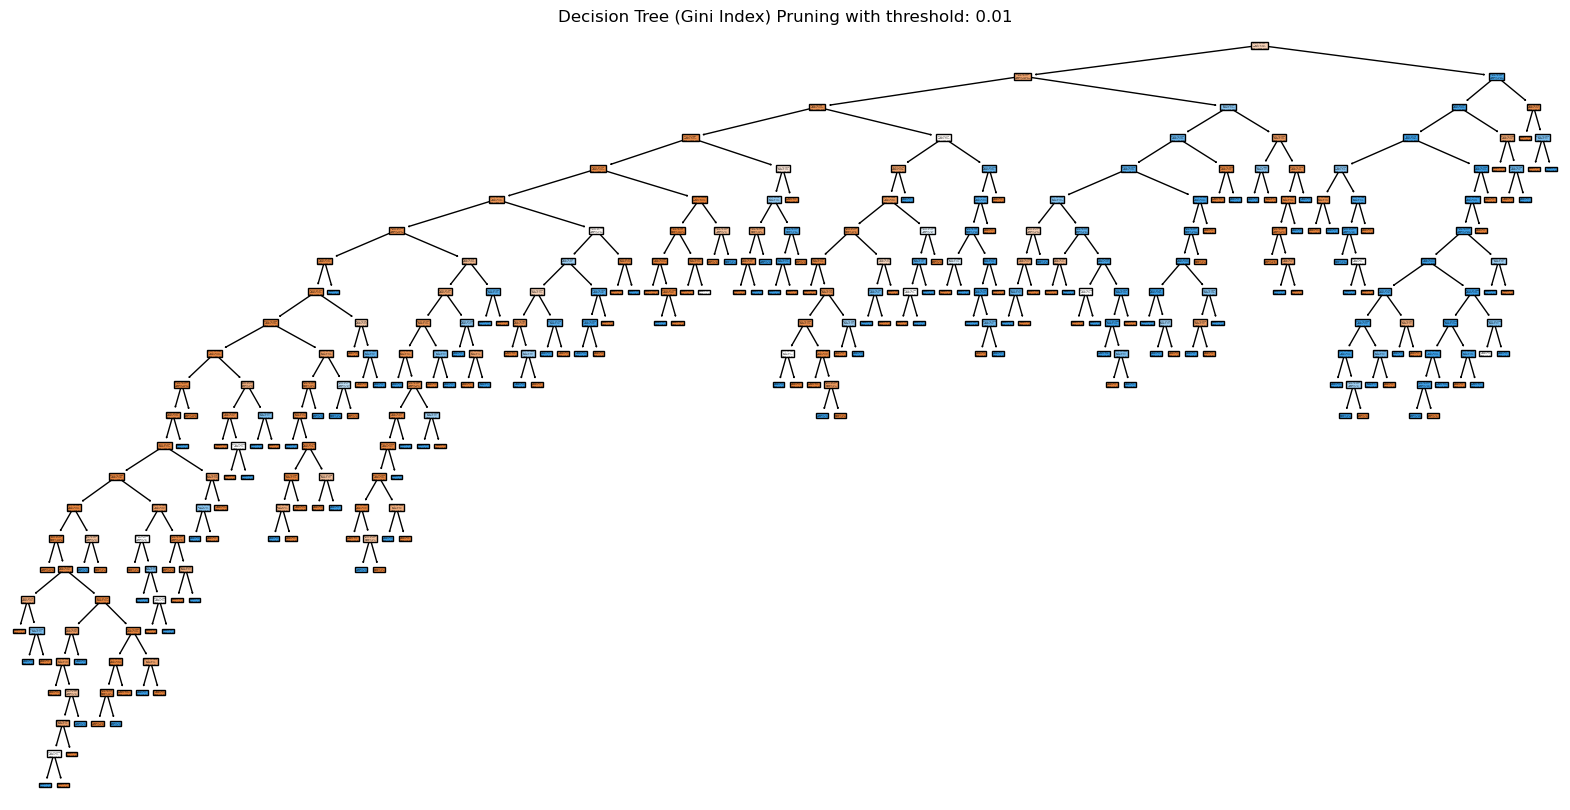

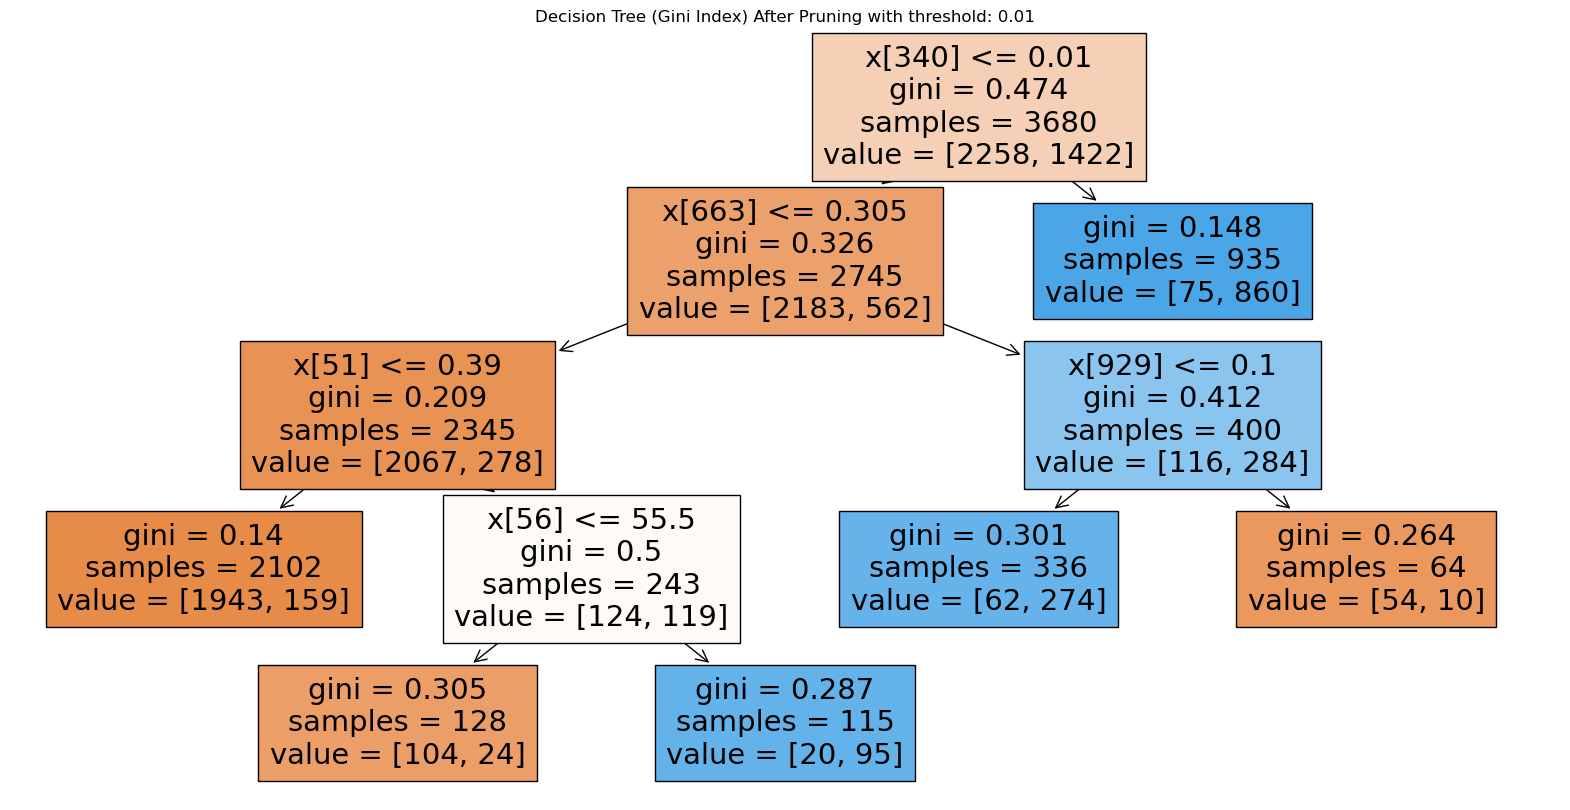

Working with threshold:  0.02


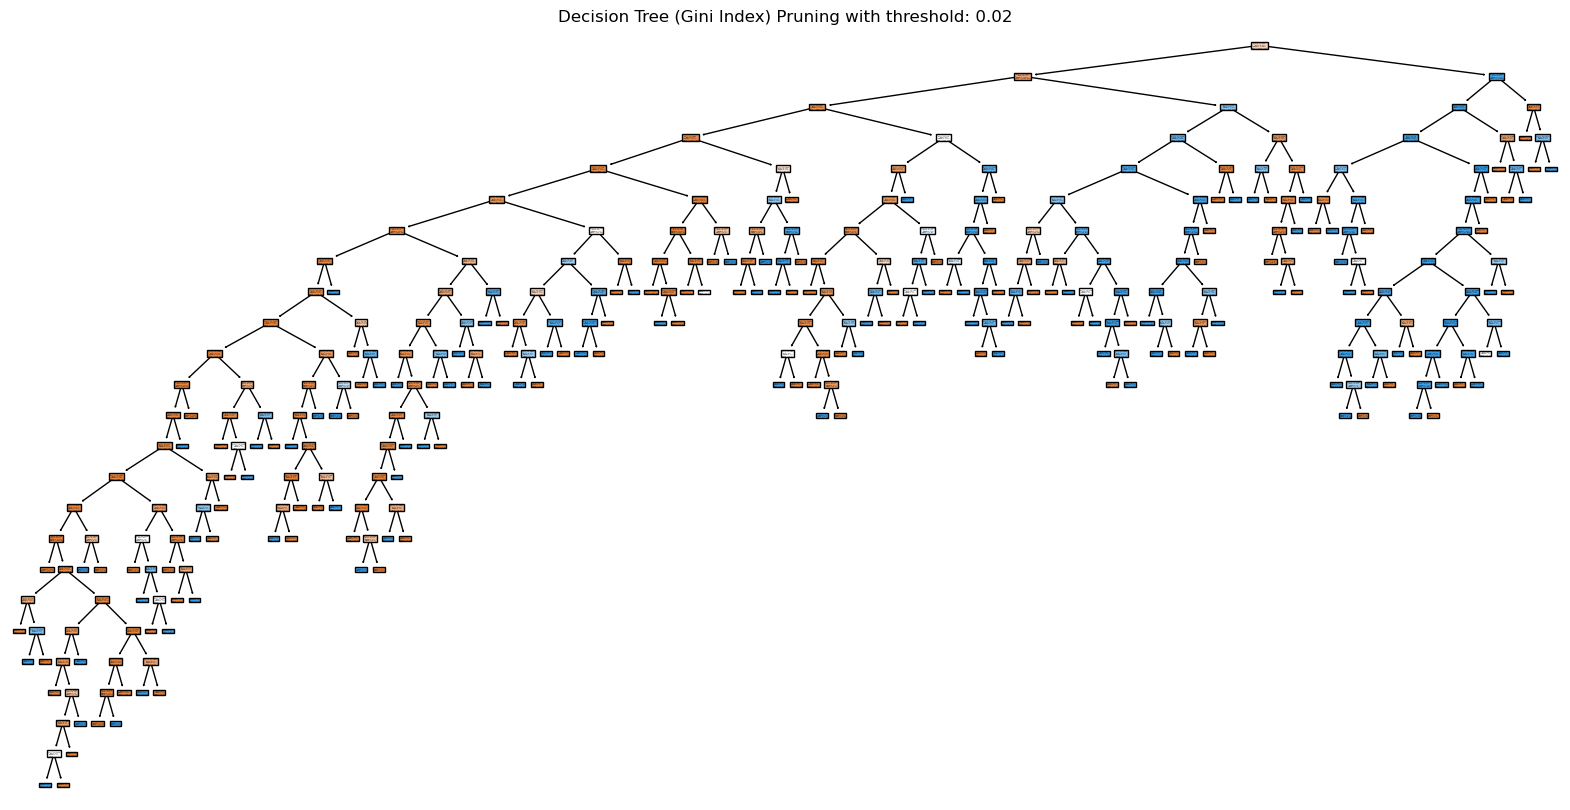

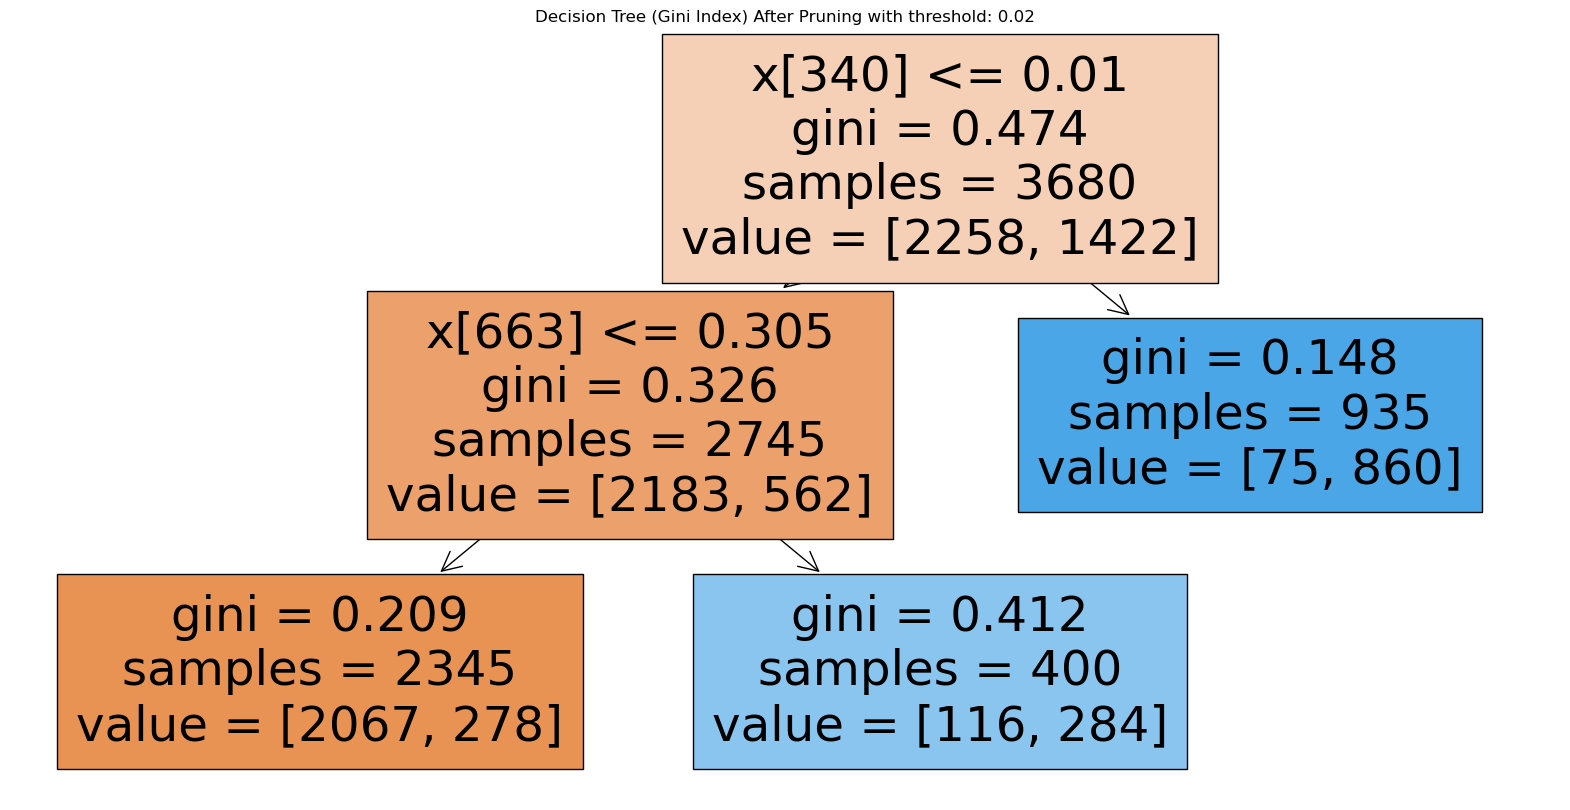

Working with threshold:  0.03


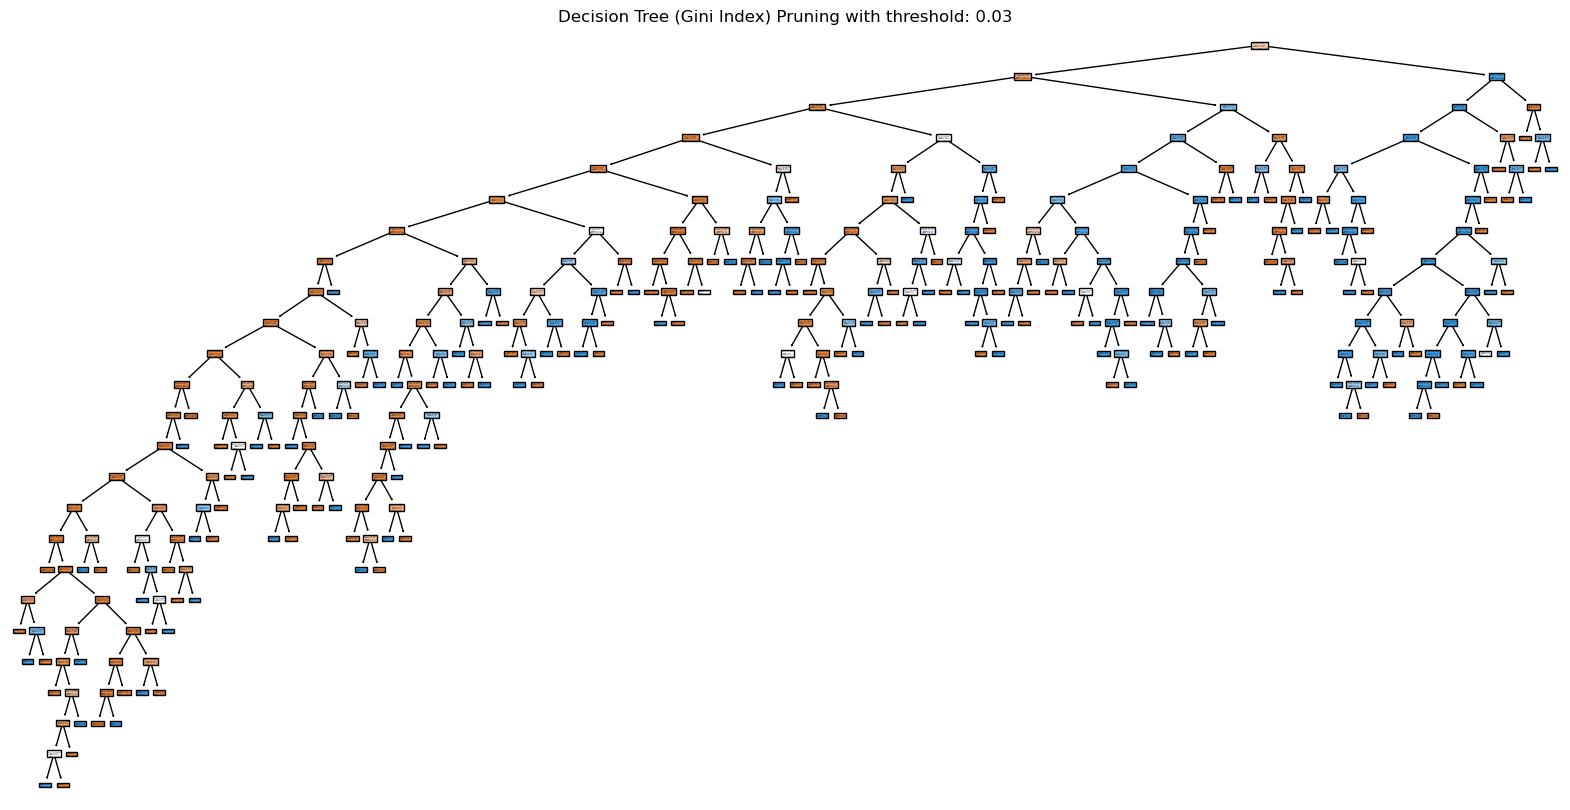

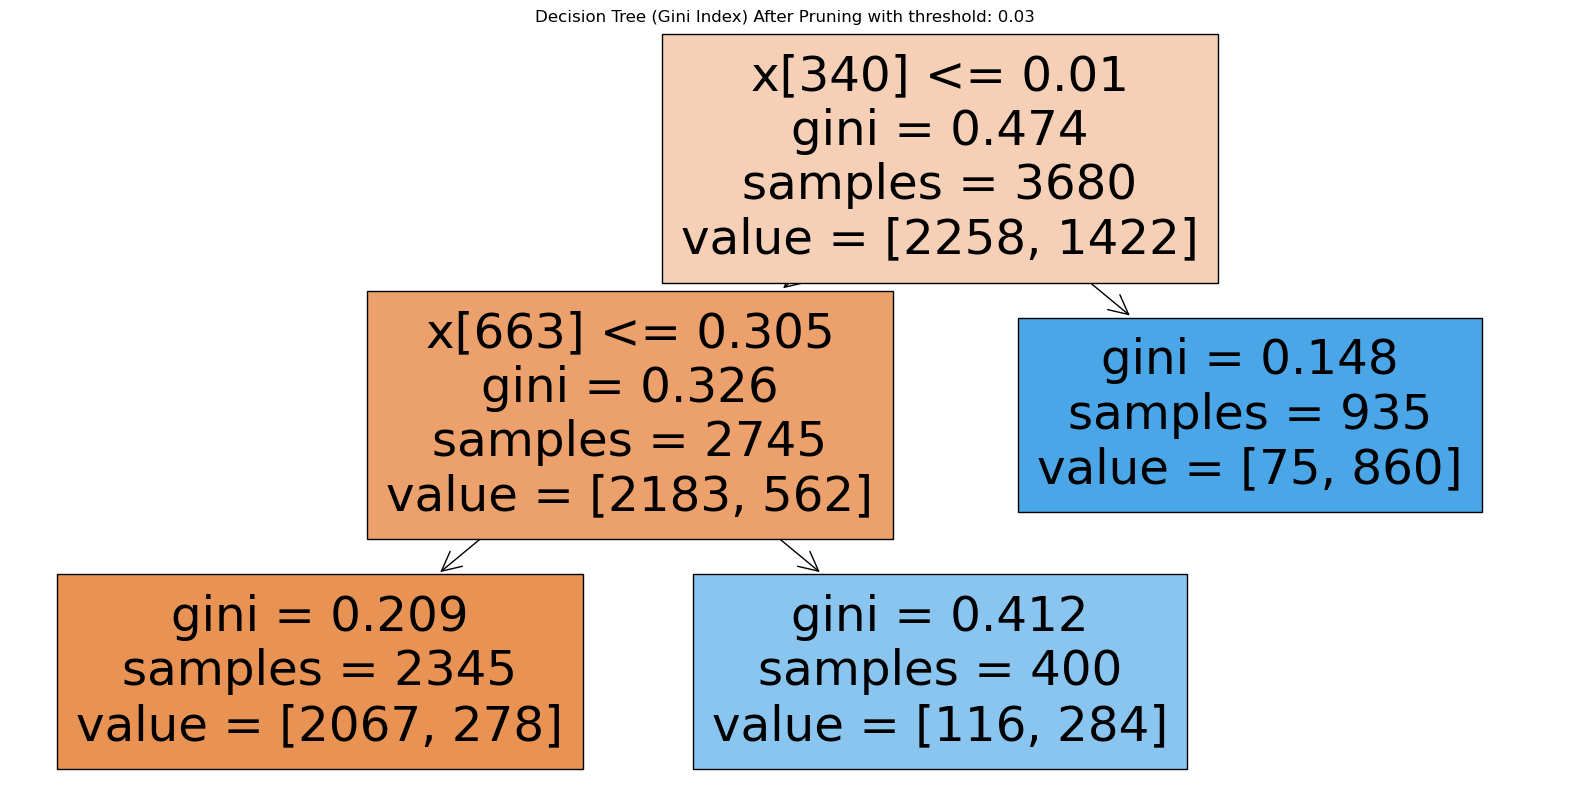

Working with threshold:  0.04


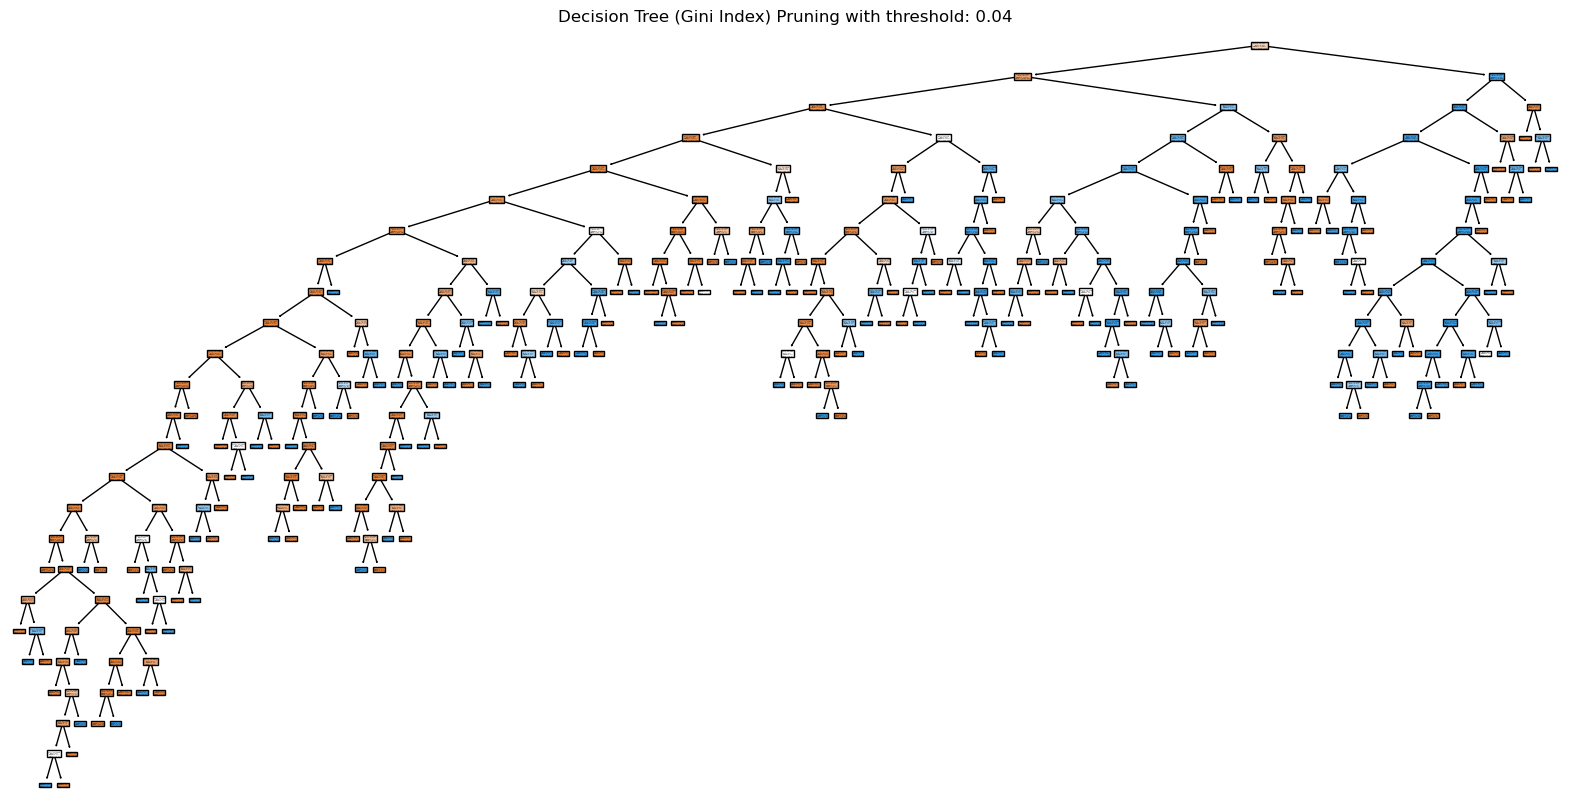

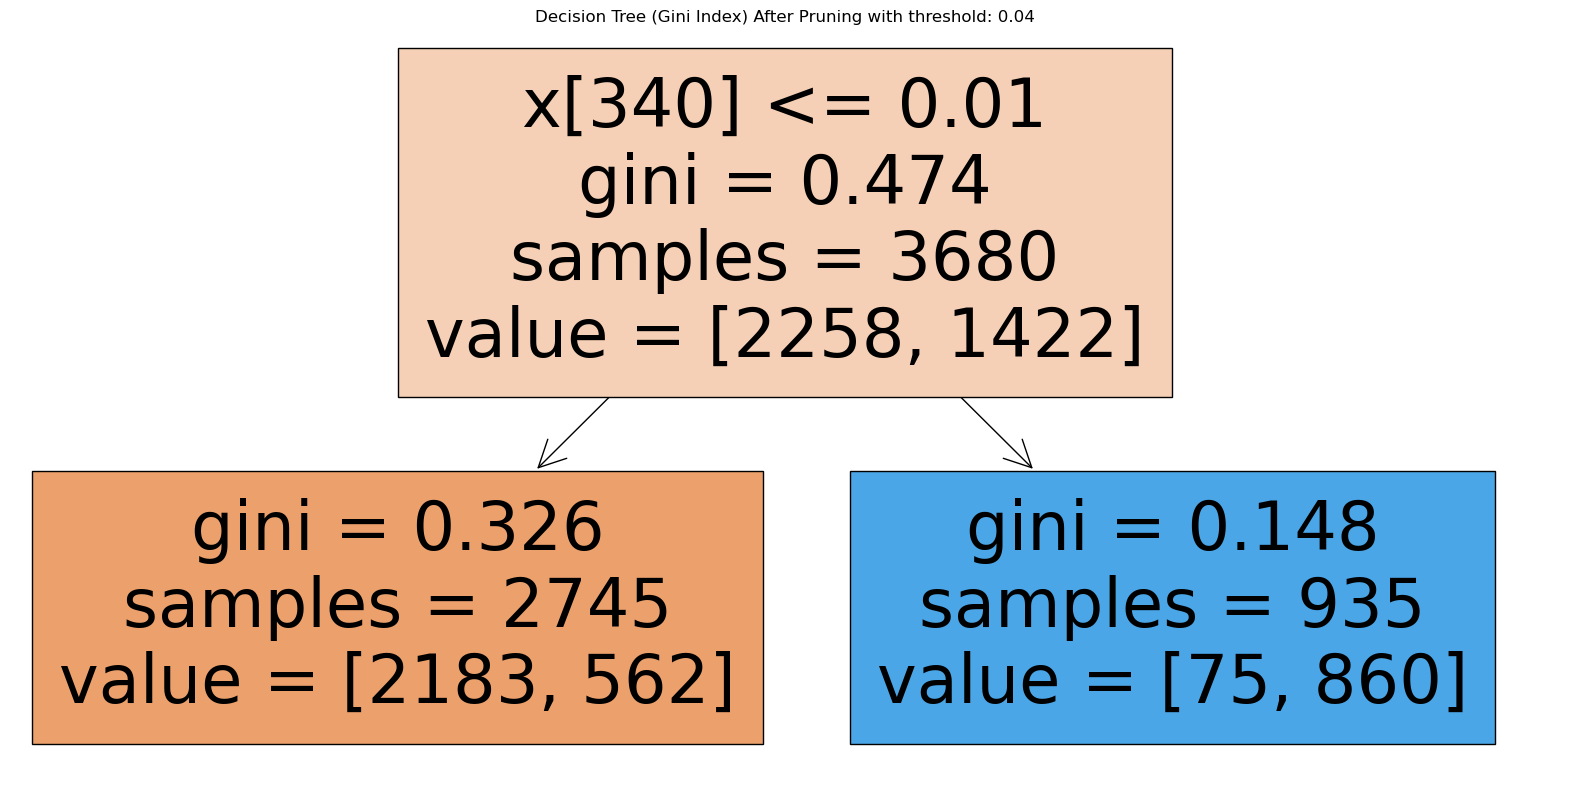

Working with threshold:  0.05


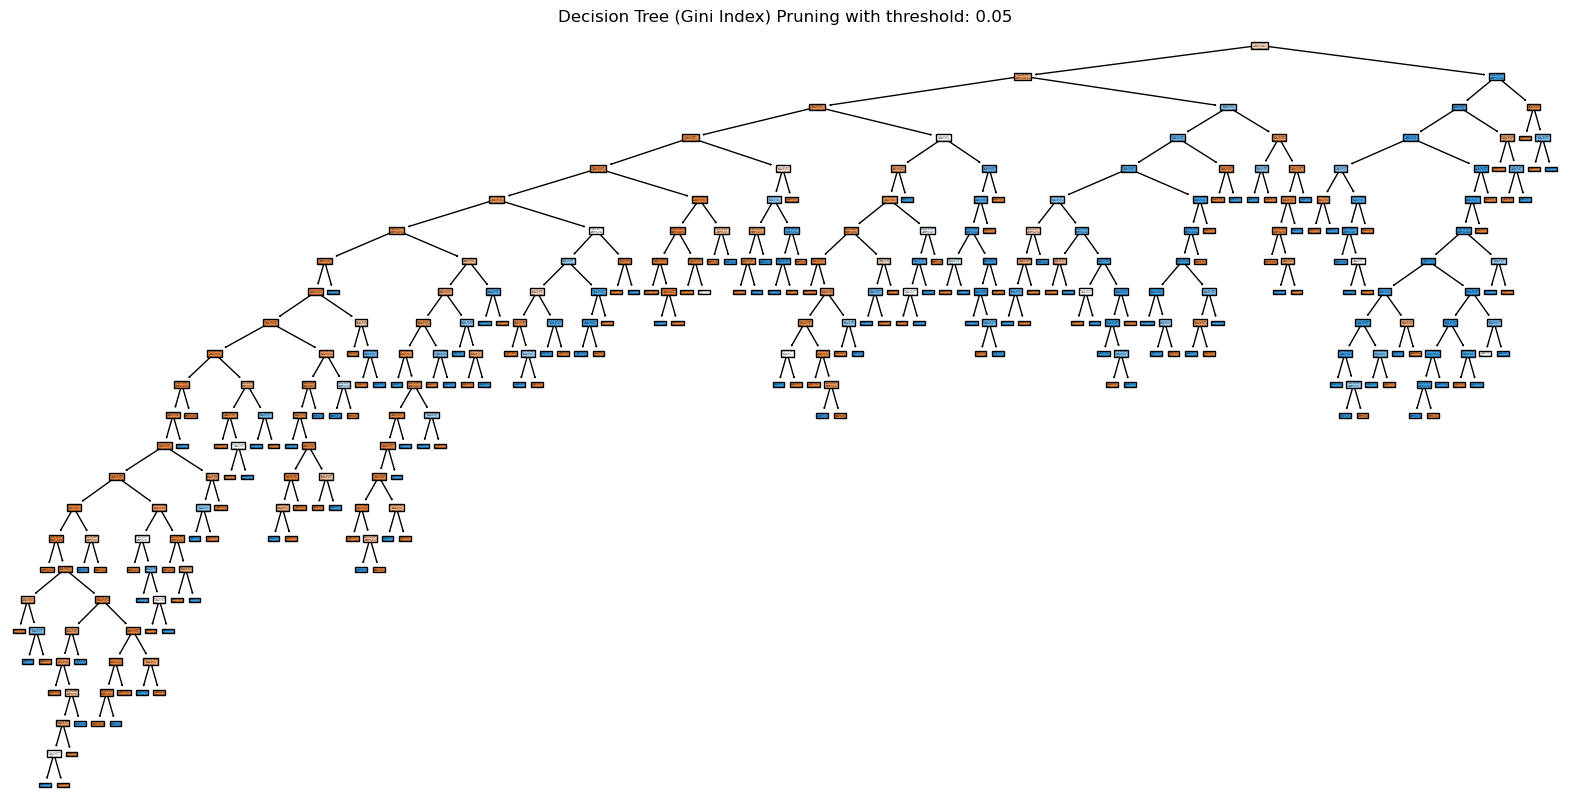

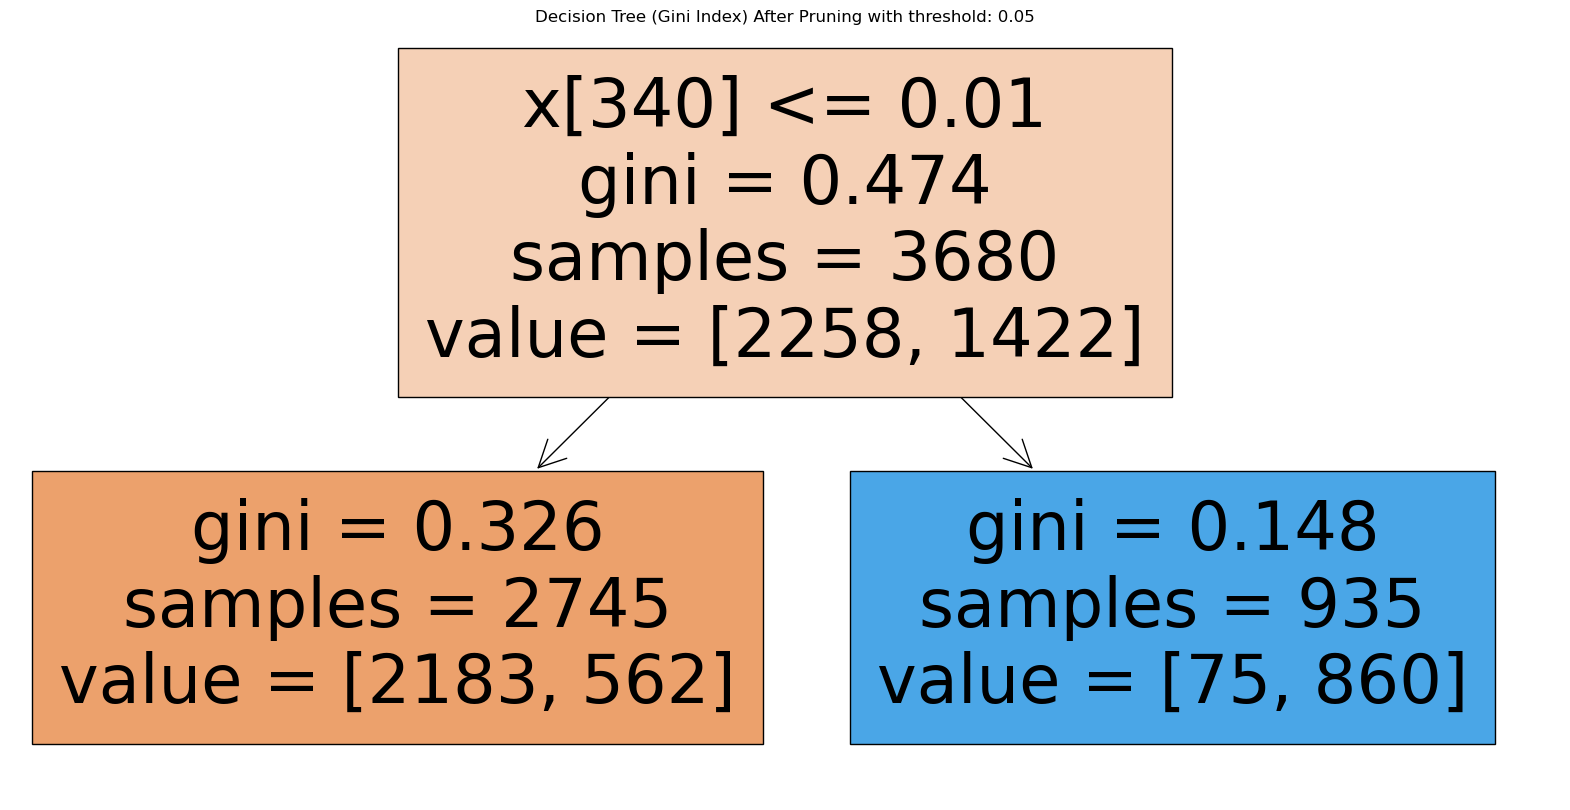

In [23]:
thresholds = [0.01, 0.02, 0.03, 0.04, 0.05]

training_errors = []
testing_errors = []

for threshold in thresholds:

    print("Working with threshold: ", threshold)

    dt = DecisionTreeClassifier(criterion='gini', random_state=42)
    dt.fit(X_train, y_train)

    plot_decision_tree(dt, 'Decision Tree (Gini Index) Pruning with threshold: ' + str(threshold))

    reduced_error_pruning(dt, X_val, y_val, threshold)

    plot_decision_tree(dt, 'Decision Tree (Gini Index) After Pruning with threshold: ' + str(threshold))

    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)

    training_accuracy = accuracy_score(y_train, y_train_pred)
    testing_accuracy = accuracy_score(y_test, y_test_pred)

    training_errors.append(1 - training_accuracy)
    testing_errors.append(1 - testing_accuracy)



In [24]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


def plot_accuracies_with_varying_thresholds(training_accuracies, testing_accuracies, title):
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, training_accuracies, label='Training Error',  linestyle='-', color='orange', marker='o', markersize=5)
    plt.plot(thresholds, testing_accuracies, label='Testing Error', linestyle='-', color='blue', marker='o', markersize=5)

    plt.title(title)
    plt.xlabel('Thresholds')
    plt.ylabel('Error')
    plt.legend()

    plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))


    plt.grid(True)
    plt.show()

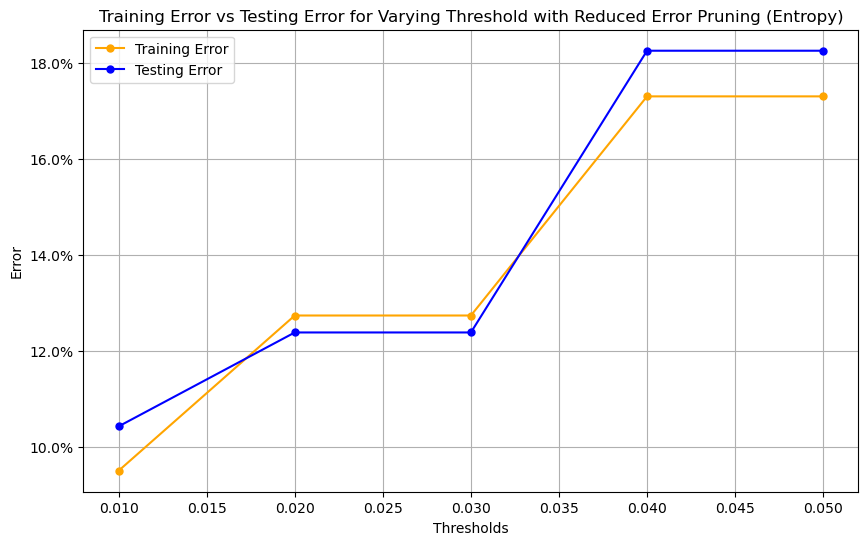

In [25]:
plot_accuracies_with_varying_thresholds(training_errors, testing_errors, 'Training Error vs Testing Error for Varying Threshold with Reduced Error Pruning (Entropy)')
